In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import seaborn as sns
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [80]:
data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20231114.csv")

/var/folders/62/5fmsns653cv0g9fgly39bn040000gn/T/ipykernel_1613/2188583418.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20231114.csv")


In [81]:
numerical_cols = data.select_dtypes(include='number').columns.tolist()
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [82]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')
data['Hour'] = data['CRASH TIME'].dt.hour
data['DayOfWeek'] = data['CRASH DATE'].dt.dayofweek
data['Month'] = data['CRASH DATE'].dt.month

In [92]:
data['Total Casualties'] = data['NUMBER OF PERSONS INJURED'] + data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF CYCLIST KILLED'] + data['NUMBER OF CYCLIST INJURED'] + data['NUMBER OF MOTORIST INJURED'] + data['NUMBER OF MOTORIST KILLED'] + data['NUMBER OF PEDESTRIANS INJURED'] + data['NUMBER OF PEDESTRIANS KILLED']
features = ['Hour', 'DayOfWeek', 'Month']
target = 'Total Casualties'
#Not dropping rows where casualties are zero...

In [94]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [96]:
predictions = model.predict(X_test)

Mean Squared Error: 1.9269975613354133


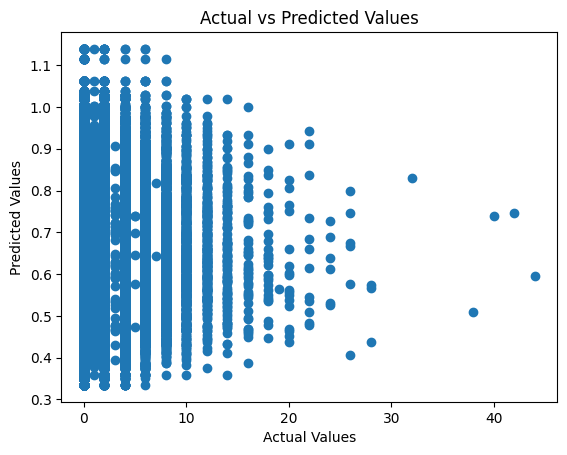

In [97]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [98]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

In [99]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [100]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Best Model Mean Squared Error: {mse}")
print("Best Parameters:", best_params)

Best Model Mean Squared Error: 1.9254814342085336
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


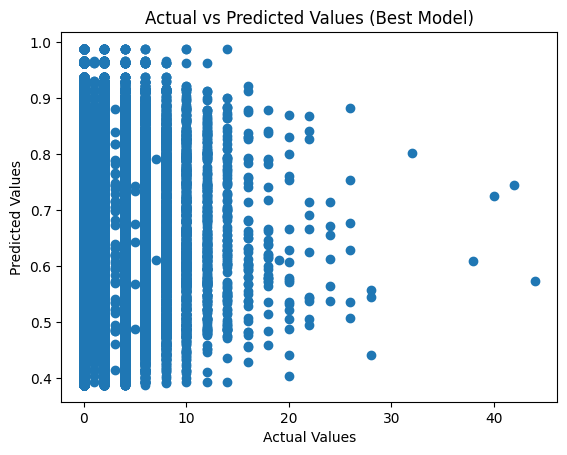

In [101]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Best Model)')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


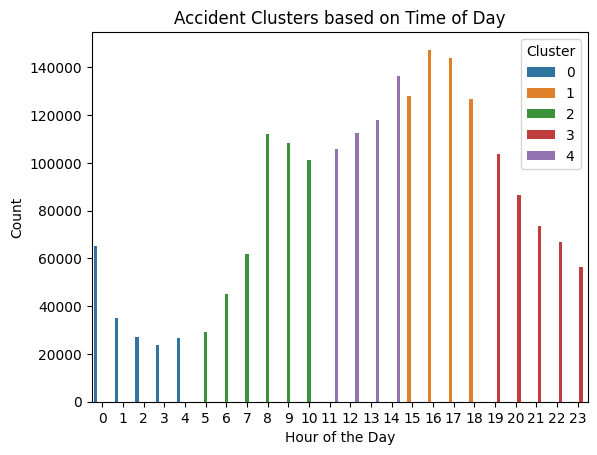

In [103]:
X_cluster = data[['Hour']]

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(X_cluster)

data['Cluster'] = kmeans.labels_

sns.countplot(x='Hour', hue='Cluster', data=data)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Accident Clusters based on Time of Day')
plt.show()